# Algorithmic Trading
## Introduction
Technology has become an asset in finance: financial institutions are now evolving to technology companies rather than just staying occupied with just the financial aspect: besides the fact that technology brings about innovation the speeds and can help to gain a competitive advantage, the speed and frequency of financial transactions, together with the large data volumes, makes that financial institutions’ attention for technology has increased over the years and that technology has indeed become a main enabler in finance.

This notebook introduces how to implement some algorithmic trading strategies in Python.

### Stocks & Trading
When a company wants to grow and undertake new projects or expand, it can issue stocks to raise capital. A stock represents a share in the ownership of a company and is issued in return for money. Stocks are bought and sold: buyers and sellers trade existing, previously issued shares. The price at which stocks are sold can move independent of the company’s success: the prices instead reflect supply and demand. This means that, whenever a stock is considered as ‘desirable’, due to a success, popularity, … the stock price will go up.

Note that stocks are not exactly the same as bonds, which is when companies raise money through borrowing, either as a loan from a bank or by issuing debt.

As you just read, buying and selling or trading is essential when you’re talking about stocks, but certainly not limited to it: trading is the act of buying or selling an asset, which could be financial security, like stock, a bond or a tangible product, such as gold or oil.

Stock trading is then the process of the cash that is paid for the stocks is converted into a share in the ownership of a company, which can be converted back to cash by selling, and this all hopefully with a profit. Now, to achieve a profitable return, you either go long or short in markets: you either by shares thinking that the stock price will go up to sell at a higher price in the future, or you sell your stock, expecting that you can buy it back at a lower price and realize a profit. When you follow a fixed plan to go long or short in markets, you have a trading strategy.

Developing a trading strategy is something that goes through a couple of phases, just like when you, for example, build machine learning models: you formulate a strategy and specify it in a form that you can test on your computer, you do some preliminary testing or backtesting, you optimize your strategy and lastly, you evaluate the performance and robustness of your strategy.

Trading strategies are usually verified by backtesting: you reconstruct, with historical data, trades that would have occurred in the past using the rules that are defined with the strategy that you have developed. This way, you can get an idea of the effectiveness of your strategy and you can use it as a starting point to optimize and improve your strategy before applying it to real markets. Of course, this all relies heavily on the underlying theory or belief that any strategy that has worked out well in the past will likely also work out well in the future, and, that any strategy that has performed poorly in the past will likely also do badly in the future.

### Time Series Data
A time series is a sequence of numerical data points taken at successive equally spaced points in time. In investing, a time series tracks the movement of the chosen data points, such as the stock price, over a specified period of time with data points recorded at regular intervals.

However, what you’ll often see when you’re working with stock data is not just two columns, that contain period and price observations, but most of the times, you’ll have five columns that contain observations of the period and the opening, high, low and closing prices of that period. This means that, if your period is set at a daily level, the observations for that day will give you an idea of the opening and closing price for that day and the extreme high and low price movement for a particular stock during that day.

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

## Python Basics For Finance: Pandas

### Importing Data
The `pandas-datareader` package allows for reading in data from sources such as Google, Yahoo! Finance, World Bank,…

Here I am pulling apple stock from IEX, which provides historical prices for upto 5 years:

In [3]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

start=datetime.datetime(2014, 10, 1)
end=datetime.datetime(2018, 1, 1)

appl = pdr.DataReader('AAPL', 'iex',start,end)
appl.head()

5y


,open,high,low,close,volume
date,,,,,
2014-10-01,94.4247,94.5186,92.6506,93.1011,51491286
2014-10-02,93.1856,94.0774,92.0310,93.7770,47757828
2014-10-03,93.3452,94.0680,92.9697,93.5142,43469585
2014-10-06,93.8239,94.4810,93.3264,93.5142,37051182
2014-10-07,93.3358,93.9835,92.6787,92.6975,42094183


An alternative to `pandas_datareader` is Quandl:

In [4]:
import quandl
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


### Working With Time Series Data
The data was read into a pandas dataframe, so all the normal functions are available

In [5]:
# Inspect the index 
aapl.index

# Inspect the columns
aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [6]:
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

              Open   High    Low  Close      Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2006-11-01  81.100  81.38  78.36  79.16  21828300.0          0.0          1.0   
2006-11-02  78.915  79.32  78.50  78.98  16624400.0          0.0          1.0   
2006-11-03  79.360  79.53  77.79  78.29  15424600.0          0.0          1.0   
2006-11-06  78.950  80.06  78.43  79.71  15520600.0          0.0          1.0   
2006-11-07  80.450  81.00  80.13  80.51  18783300.0          0.0          1.0   

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  
Date                                                                  
2006-11-01  10.422480  10.458464  10.070352   10.173163  152798100.0  
2006-11-02  10.141677  10.193726  10.088344   10.150031  116370800.0  
2006-11-03  10.198866  10.220713   9.997099   10.061356  107972200.0  
2006-11-06  10.146175  10.288826  10.079348   10.243846  108644200.0  
2006-1

In [7]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
print(monthly_aapl)

              Open    High       Low     Close      Volume  Ex-Dividend  \
Date                                                                      
2007-08-02  136.65  136.96  134.1500  136.4900  30451600.0          0.0   
2008-06-03  186.90  188.20  182.3354  185.3700  26804300.0          0.0   
2008-05-27  182.80  186.43  181.8400  186.4300  28210900.0          0.0   
2010-08-11  255.40  255.69  249.8100  250.1900  22144800.0          0.0   
2009-03-19  101.91  103.20  100.2500  101.6200  17863600.0          0.0   
2010-05-26  250.08  252.13  243.7500  244.1090  30380500.0          0.0   
2006-11-10   83.55   83.60   82.5000   83.1200  13352300.0          0.0   
2011-04-20  343.51  345.75  341.5000  342.4100  25023800.0          0.0   
2008-04-29  171.11  175.66  170.2500  175.0500  32981300.0          0.0   
2010-06-14  255.96  259.15  254.0100  254.2800  21534300.0          0.0   
2007-06-20  123.87  124.66  121.5000  121.5500  32054000.0          0.0   
2007-08-28  130.99  132.4

In [8]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

# Delete the new `diff` column
del aapl['diff']

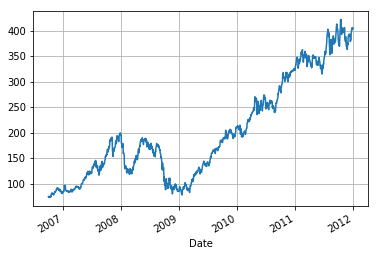

In [9]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

## Common Financila Analysis
In the rest of this section, I will explore returns, moving windows, volatility calculation and Ordinary Least-Squares Regression (OLS).

### Returns
The simple daily percentage doesn't take into account dividends and other factors and represents the amount of percentage change in the value of a stock over a single day of trading.

Note I am calculating te log returns to get a better insight into the growth of the returns over the timeperiod.

In [10]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj. Close']]

# Daily retuns 
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj. Close
Date                  
2006-10-02    0.000000
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
2006-10-09    0.005524
2006-10-10   -0.010988
2006-10-11   -0.007858
2006-10-12    0.027721
2006-10-13   -0.003189
2006-10-16    0.005065
2006-10-17   -0.014721
2006-10-18    0.003231
2006-10-19    0.059842
2006-10-20    0.012153
2006-10-23    0.018887
2006-10-24   -0.005033
2006-10-25    0.007773
2006-10-26    0.006244
2006-10-27   -0.021657
2006-10-30    0.000124
2006-10-31    0.008207
2006-11-01   -0.023680
2006-11-02   -0.002274
2006-11-03   -0.008736
2006-11-06    0.018138
2006-11-07    0.010036
2006-11-08    0.024096
2006-11-09    0.010794
2006-11-10   -0.002640
...                ...
2011-11-17   -0.019128
2011-11-18   -0.006545
2011-11-21   -0.015816
2011-11-22    0.020325
2011-11-23   -0.025285
2011-11-25   -0.009319
2011-11-28    0.034519
2011-11-29   -0.007763
2011-11-30    0.024116
2011-12-01    0.014992
2011-12-02 

In [11]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.125782,0.124336,0.121461,0.122890,0.369611,NaN,0.0,0.125782,0.124336,0.121461,0.122890,0.369611
2007-06-30,0.196028,0.195413,0.198331,0.197710,-0.080296,NaN,0.0,0.196028,0.195413,0.198331,0.197710,-0.080296
2007-10-31,0.400986,0.404614,0.392010,0.400796,0.306882,NaN,0.0,0.400986,0.404614,0.392010,0.400796,0.306882
2008-02-29,0.127085,0.131274,0.117746,0.120394,0.172293,NaN,0.0,0.127085,0.131274,0.117746,0.120394,0.172293
2008-06-30,-0.003844,-0.004781,0.005927,0.003673,-0.209762,NaN,0.0,-0.003844,-0.004781,0.005927,0.003673,-0.209762
2008-10-31,-0.114295,-0.108566,-0.124619,-0.118803,0.133219,NaN,0.0,-0.114295,-0.108566,-0.124619,-0.118803,0.133219
2009-02-28,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601,NaN,0.0,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601
2009-06-30,0.311992,0.304360,0.324701,0.316630,-0.386935,NaN,0.0,0.311992,0.304360,0.324701,0.316630,-0.386935


Using pct_change() is quite the convenience, but it also obscures how exactly the daily percentages are calculated. That’s why you can alternatively make use of Pandas’ shift() function instead of using pct_change(). You then divide the daily_close values by the daily_close.shift(1) -1. By using this function, however, you will be left with NA values in the beginning of the resulting DataFrame.

In [12]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
2006-10-09    0.005524
2006-10-10   -0.010988
2006-10-11   -0.007858
2006-10-12    0.027721
2006-10-13   -0.003189
2006-10-16    0.005065
2006-10-17   -0.014721
2006-10-18    0.003231
2006-10-19    0.059842
2006-10-20    0.012153
2006-10-23    0.018887
2006-10-24   -0.005033
2006-10-25    0.007773
2006-10-26    0.006244
2006-10-27   -0.021657
2006-10-30    0.000124
2006-10-31    0.008207
2006-11-01   -0.023680
2006-11-02   -0.002274
2006-11-03   -0.008736
2006-11-06    0.018138
2006-11-07    0.010036
2006-11-08    0.024096
2006-11-09    0.010794
2006-11-10   -0.002640
...                ...
2011-11-17   -0.019128
2011-11-18   -0.006545
2011-11-21   -0.015816
2011-11-22    0.020325
2011-11-23   -0.025285
2011-11-25   -0.009319
2011-11-28    0.034519
2011-11-29   -0.007763
2011-11-30    0.024116
2011-12-01    0.014992
2011-12-02 

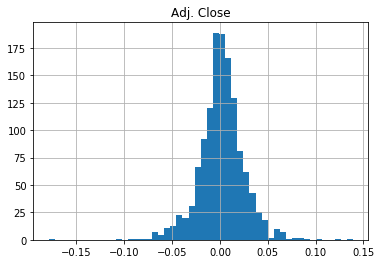

        Adj. Close
count  1322.000000
mean      0.001567
std       0.023994
min      -0.179195
25%      -0.010630
50%       0.001680
75%       0.014306
max       0.139050


In [13]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

The distribution looks very symmetrical and normally distributed: the daily changes centre approximately around 0.0. Using `.describe()` we can see that it is actually centred arounf 0.001567 and the standard deviation is 0.024.

The **cumulative daily rated of return** is useful to determine the value of an investment at regular intervals. The daily rate of return can be calculated by using the daily percentage change values, adding 1 to them and calculating the cumulative product with the resulting values:

In [14]:
#ncumulatice daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

print(cum_daily_return)

            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03    0.989447
2006-10-04    1.006946
2006-10-05    0.999599
2006-10-06    0.991451
2006-10-09    0.996928
2006-10-10    0.985974
2006-10-11    0.978226
2006-10-12    1.005343
2006-10-13    1.002137
2006-10-16    1.007213
2006-10-17    0.992386
2006-10-18    0.995592
2006-10-19    1.055170
2006-10-20    1.067994
2006-10-23    1.088165
2006-10-24    1.082688
2006-10-25    1.091103
2006-10-26    1.097916
2006-10-27    1.074138
2006-10-30    1.074272
2006-10-31    1.083088
2006-11-01    1.057441
2006-11-02    1.055036
2006-11-03    1.045819
2006-11-06    1.064788
2006-11-07    1.075474
2006-11-08    1.101389
2006-11-09    1.113278
2006-11-10    1.110339
...                ...
2011-11-17    5.041544
2011-11-18    5.008549
2011-11-21    4.929335
2011-11-22    5.029522
2011-11-23    4.902351
2011-11-25    4.856666
2011-11-28    5.024312
2011-11-29    4.985306
2011-11-30    5.105530
2011-12-01    5.182073
2011-12-02 

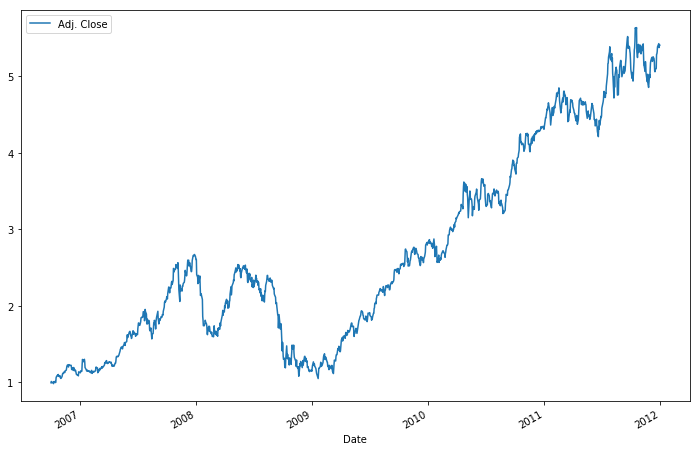

In [15]:
import matplotlib.pyplot as plt 

cum_daily_return.plot(figsize=(12,8))

plt.show()

In [17]:
# Resample the cumulative daily retunr to cumulaitve monthly return
cum_monthly_return = cum_daily_return.resample("M").mean()

print(cum_monthly_return)

            Adj. Close
Date                  
2006-10-31    1.031704
2006-11-30    1.140058
2006-12-31    1.155110
2007-01-31    1.187303
2007-02-28    1.145275
2007-03-31    1.210302
2007-04-30    1.251735
2007-05-31    1.453453
2007-06-30    1.625637
2007-07-31    1.818073
2007-08-31    1.734484
2007-09-30    1.897943
2007-10-31    2.295092
2007-11-30    2.333129
2007-12-31    2.544819
2008-01-31    2.142375
2008-02-29    1.671827
2008-03-31    1.747569
2008-04-30    2.113108
2008-05-31    2.468067
2008-06-30    2.384260
2008-07-31    2.240831
2008-08-31    2.285193
2008-09-30    1.886766
2008-10-31    1.322521
2008-11-30    1.254883
2008-12-31    1.222864
2009-01-31    1.185880
2009-02-28    1.256669
2009-03-31    1.302697
...                ...
2009-07-31    1.994629
2009-08-31    2.221219
2009-09-30    2.374922
2009-10-31    2.575896
2009-11-30    2.675928
2009-12-31    2.657690
2010-01-31    2.774723
2010-02-28    2.655557
2010-03-31    2.984379
2010-04-30    3.354910
2010-05-31 

### Gather More Companies Data
This will be done by writing a function that takes the symbol of the stock, start and end date. The nest function `data()` the takes the company symbol to get the data from the start date to the end date and returns it so that the `get()` function can continue.

In [25]:
import quandl

def get(tickers, startdate, enddate):
    def data(ticker):
        return (quandl.get(ticker, start_date=startdate, end_date=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))
tickers = ['WIKI/AAPL']
#tickers = ['WIKI/AAPL', 'WIKI/MSFT', 'WIKI/IBM', 'WIKI/GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data.sample(20)

Open      High       Low     Close      Volume  \
Ticker    Date                                                             
WIKI/AAPL 2007-10-01  154.6300  157.4100  152.9300  156.3390  29895300.0   
          2010-08-10  259.8500  260.4500  257.5500  259.4100  16140000.0   
          2007-01-08   85.9600   86.5300   85.2800   85.4700  28468100.0   
          2008-10-07  100.4800  101.5000   88.9500   89.1600  67099000.0   
          2010-12-09  322.1317  322.5000  319.0200  319.7575  10505400.0   
          2011-06-20  317.3550  317.7000  310.5000  315.3200  22880200.0   
          2011-04-27  352.2400  352.3500  347.1000  350.1500  12721900.0   
          2009-02-23   91.6000   92.0000   86.5100   86.9500  28106500.0   
          2008-12-29   86.5200   87.6200   85.0700   86.6100  24500000.0   
          2009-09-30  186.1300  186.4500  182.6127  185.3500  19270900.0   
          2008-08-05  155.5000  160.8000  154.8200  160.6400  24584700.0   
          2010-08-26  245.4500  245.7500  240.2778  240.2800  16660900.0   
          2009-12-30  208.8300  212.0000  208.3100  211.6400  14717300.0   
          2011-09-09  383.9300  386.0000  375.0200  377.4800  20171900.0   
          2010-07-16  253.1800  254.9700  248.4100  249.9000  37137800.0   
          2007-12-28  200.5900  201.5600  196.8801  199.8300  24987400.0   
          2010-10-08  291.7129  294.5000  290.0000  294.0700  23514400.0   
          2007-08-16  117.0100  118.5000  111.6200  117.0500  66667500.0   
          2007-03-12   88.0700   89.9900   87.9900   89.8700  26050300.0   
          2007-11-26  173.5900  177.2699  172.3500  172.5419  46634100.0   

                      Ex-Dividend  Split Ratio  Adj. Open  Adj. High  \
Ticker    Date                                                         
WIKI/AAPL 2007-10-01          0.0          1.0  19.872110  20.229379   
          2010-08-10          0.0          1.0  33.394347  33.471455   
          2007-01-08          0.0          1.0  11.047058  11.120311   
          2008-10-07          0.0          1.0  12.913080  13.044165   
          2010-12-09          0.0          1.0  41.398413  41.445745   
          2011-06-20          0.0          1.0  40.784541  40.828878   
          2011-04-27          0.0          1.0  45.267749  45.281886   
          2009-02-23          0.0          1.0  11.771877  11.823282   
          2008-12-29          0.0          1.0  11.119026  11.260391   
          2009-09-30          0.0          1.0  23.920299  23.961424   
          2008-08-05          0.0          1.0  19.983917  20.665041   
          2010-08-26          0.0          1.0  31.543746  31.582300   
          2009-12-30          0.0          1.0  26.837566  27.244955   
          2011-09-09          0.0          1.0  49.340356  49.606380   
          2010-07-16          0.0          1.0  32.537159  32.767199   
          2007-12-28          0.0          1.0  25.778611  25.903269   
          2010-10-08          0.0          1.0  37.489173  37.847355   
          2007-08-16          0.0          1.0  15.037416  15.228902   
          2007-03-12          0.0          1.0  11.318222  11.564969   
          2007-11-26          0.0          1.0  22.308734  22.781653   

                       Adj. Low  Adj. Close  Adj. Volume  
Ticker    Date                                            
WIKI/AAPL 2007-10-01  19.653636   20.091740  209267100.0  
          2010-08-10  33.098765   33.337801  112980000.0  
          2007-01-08  10.959669   10.984086  199276700.0  
          2008-10-07  11.431315   11.458303  469693000.0  
          2010-12-09  40.998516   41.093295   73537800.0  
          2011-06-20  39.903578   40.523015  160161400.0  
          2011-04-27  44.607188   44.999155   89053300.0  
          2009-02-23  11.117741   11.174287  196745500.0  
          2008-12-29  10.932681   11.130592  171500000.0  
          2009-09-30  23.468277   23.820058  134896300.0  
          2008-08-05  19.896528   20.644479  172092900.0  
 

The function above only works for premium subscribers to quandl, as free users are not able to make concurrent calls. Therefore a modified function is below.

In [29]:
# import quandl
def data(ticker, startdate, enddate):
    return (quandl.get(ticker, start_date=startdate, end_date=enddate))


def get(tickers, startdate, enddate):
    datas = []
    for ticker in tickers:
        dat = data(ticker)
        datas.append(dat) 
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['WIKI/AAPL', 'WIKI/MSFT', 'WIKI/IBM', 'WIKI/GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data.head(5)

NameError: name 'startdate' is not defined